In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(42)

In [22]:
def get_state(curr_state, drift, days):
    """
    Calculates the next state based on the current state and drift.
    """
    delta = np.random.randint(-drift, drift, dtype=int)
    next_state = curr_state + delta
    if next_state > 2 * days * drift:
        return 2 * days * drift
    elif next_state < 0:
        return 0
    return next_state

In [23]:
def get_reward(curr_state, action, days, drift, start_price, strike_price):
    """
    Calculates the reward based on the current state and action.
    """
    if action == 0:
        return 0
    else:
        return max(0, curr_state - days * drift + start_price - strike_price)

In [24]:
def monte_carlo(start_price, strike_price,drift,days,rewards_per_episode, start_states, gamma=0.999, num_episodes=1000000, exploration_decreasing_decay =  0.995, min_exploration_proba = 0.010, epsilon=1):
    Q=np.zeros((2*drift*days+1,days,2))
    Returns = []
    for state in range(2*days*drift + 1):
        state_returns = []
        for t in range(days):
            time_returns = []
            for action in range(2):
                action_returns = []
                time_returns.append(action_returns)
            state_returns.append(time_returns)
        Returns.append(state_returns)
    
    count=np.zeros((2*drift*days+1,days,2))

    for episode_num in range(num_episodes):
        if(episode_num%10000==0):
            print(episode_num)
        total_episode_reward=0
        curr_state=episode_num % (2 * days * drift + 1)

        episode=[]
        t=np.random.randint(0,days)
        t0=t  
        start_states.append((curr_state,t0))
        while(t<days):
            if np.random.uniform(0,1) < epsilon:
                action = np.random.choice([0,1])
            else:
                action = np.argmax(Q[curr_state,t,:])
            count[curr_state][t][action]+=1
            reward=get_reward(curr_state,1,days,drift,start_price,strike_price)
            if action==1:
                episode.append((curr_state,action,reward))
                total_episode_reward=reward*math.pow(gamma,t-t0)
                break
            else:
                reward = 0
                episode.append((curr_state,action,reward))
            curr_state=get_state(curr_state,drift,days)
            t+=1
        
        G = 0
        for t in reversed(range(len(episode))):
            G = gamma * G + episode[t][2]
            Returns[episode[t][0]][t0 + t][episode[t][1]].append(G)
            Q[episode[t][0]][t0 + t][episode[t][1]] = np.mean(Returns[episode[t][0]][t0 + t][episode[t][1]])
                
        epsilon = max(min_exploration_proba, epsilon*exploration_decreasing_decay)
        rewards_per_episode.append(total_episode_reward)
    policy=[]
    for i in range(days):
        curr=[]
        for state in range(0,2*days*drift-1):
            if(Q[state][i][1]>Q[state][i][0]):
                curr.append(1)
            else:
                curr.append(0)
        policy.append(curr)
    
    for ele in policy:
        print(ele)
    
    return Q


In [25]:
np.random.seed(42)
rewards_per_episode = []
start_states = []
regrets = []
V = []
days=10
drift=8
start = 500
strike=510
Q = monte_carlo(start,strike,drift,days,rewards_per_episode,start_states)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1

In [26]:
arr=[]
for i in range(days):
    curr=[]
    for state in range(0,2*days*drift-1):
        if(Q[state][i][1]>Q[state][i][0]):
            arr.append(state+start-days*drift)
            print("Optimal Stopping for Day:",i+1,"is",state+start-days*drift-1)
            break

Optimal Stopping for Day: 1 is 517
Optimal Stopping for Day: 2 is 515
Optimal Stopping for Day: 3 is 515
Optimal Stopping for Day: 4 is 515
Optimal Stopping for Day: 5 is 515
Optimal Stopping for Day: 6 is 515
Optimal Stopping for Day: 7 is 514
Optimal Stopping for Day: 8 is 512
Optimal Stopping for Day: 9 is 510
Optimal Stopping for Day: 10 is 510


In [27]:
def transition_probability(drift):
    """
    Calculates the transition probability for the given drift.
    """
    return 1 / (2 * drift + 1)

def get_state(drift):
    """
    Generates a random state within the given drift range.
    """
    return np.random.randint(-drift, drift, dtype=int) 

def value_iteration(gamma=0.99):
    """
    Performs value iteration to find the optimal policy.
    """
    start_price, strike_price = 500, 510
    drift = 8  # Change in stock price on each day
    T = 10  # Number of days till expiry

    V = np.zeros((2 * T * drift + 1, T))
    policy = np.zeros((T, 2 * T * drift + 1))

    # Initialize the value function and policy
    for state in range(2 * T * drift + 1):
        V[state][T - 1] = max(0, state - (strike_price - start_price) - T * drift)
        if V[state][T - 1] > 0:
            policy[T - 1][state] = 1

    # Perform value iteration
    for t in reversed(range(T - 1)):
        Q = np.zeros((2 * T * drift + 1, 2))
        for state in range(2 * T * drift + 1):
            for action in [0, 1]:
                new_value = 0.0
                if action == 0:
                    reward = 0
                    for next_state in range(state - drift, state + drift):
                        if 0 <= next_state <= 2 * T * drift:
                            new_value += transition_probability(drift) * (reward + gamma * V[next_state][t + 1])
                else:
                    reward = max(0, state - (strike_price - start_price) - T * drift)
                    new_value = reward
                Q[state][action] = new_value
            V[state][t] = max(Q[state])
            # Update policy based on Q values
            if Q[state][0] >= Q[state][1]:
                policy[t][state] = 0
            else:
                policy[t][state] = 1
    return V

In [28]:
V = value_iteration()  # Initialize V with zeros

In [29]:
regrets=[]
for i in range(0,len(start_states)):
    if len(regrets) == 0:
        regrets.append(V[start_states[i]] - rewards_per_episode[i])
    else:
        regrets.append(V[start_states[i]] - rewards_per_episode[i])

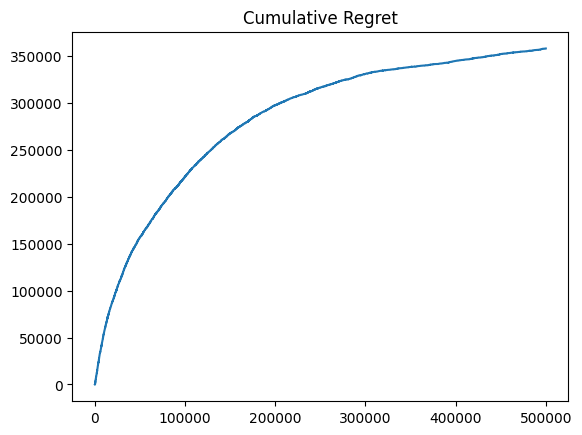

In [33]:
arr_tot = np.cumsum(regrets)
plt.plot(arr_tot[:500000])
plt.title("Cumulative Regret")
plt.xlabel("Iteration")
plt.ylabel("Regret")
plt.show()

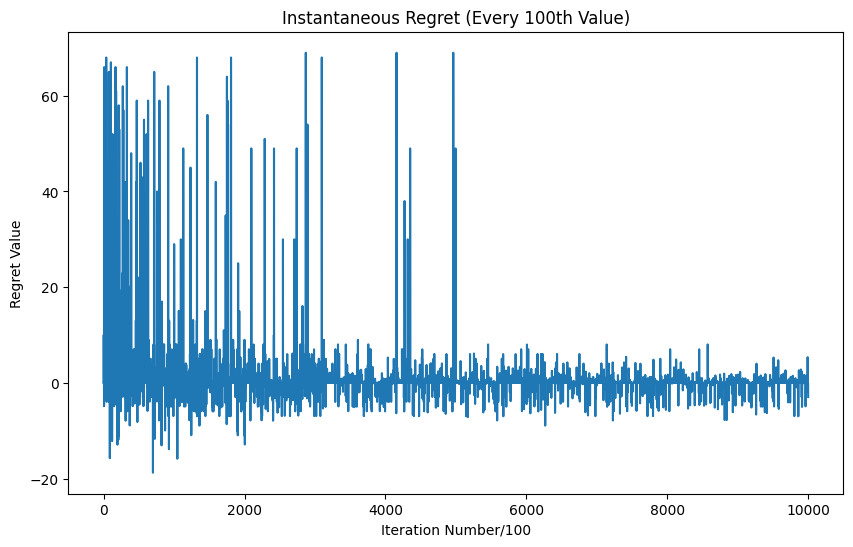

In [34]:
regrets_downsampled = regrets[::100]

plt.figure(figsize=(10, 6))
plt.plot(regrets_downsampled)
plt.title("Instantaneous Regret (Every 100th Value)")
plt.xlabel("Iteration Number/100")
plt.ylabel("Regret Value")
plt.show()

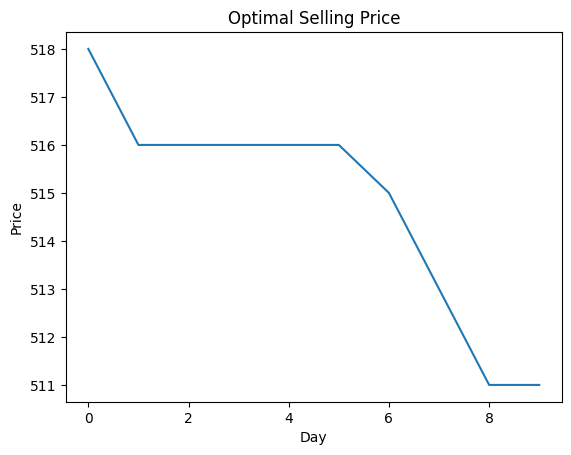

In [32]:
plt.plot(arr)
plt.title("Optimal Selling Price")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()